In [1]:
# Import data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [2]:
# Set matplotlib
matplotlib.style.available
matplotlib.style.use('_mpl-gallery')

In [3]:
# Extract data
df = pd.read_csv("Task 4 - Homemade coil.csv", skiprows=20)
df.head()

,Frequency (Hz),Channel 1 Magnitude (dB),Channel 2 Magnitude (dB),Channel 2 Phase (*)
0,100.000000,-0.015644,-57.150583,55.472472
1,101.859139,-0.015745,-57.213857,56.041496
2,103.752842,-0.015595,-57.047677,57.143218
3,105.681751,-0.015586,-56.892673,57.626428
4,107.646521,-0.015631,-56.793732,58.113744


In [4]:
def find_nearest(array, target):
    diff = array - target
    return np.argmin(np.abs(diff))

In [5]:
Freq = np.array(df['Frequency (Hz)'])
Gain = np.array(df['Channel 2 Magnitude (dB)'])
Phase = np.array(df['Channel 2 Phase (*)'])

In [6]:
Cutoff_gain = Gain[find_nearest(Gain, -3)]
Cutoff_freq = Freq[find_nearest(Gain, -3)]

In [7]:
print("This is the cut-off frequency:", Cutoff_freq)

This is the cut-off frequency: 91201.08393559096


Text(0.5, 0, 'Frequency (Hz)')

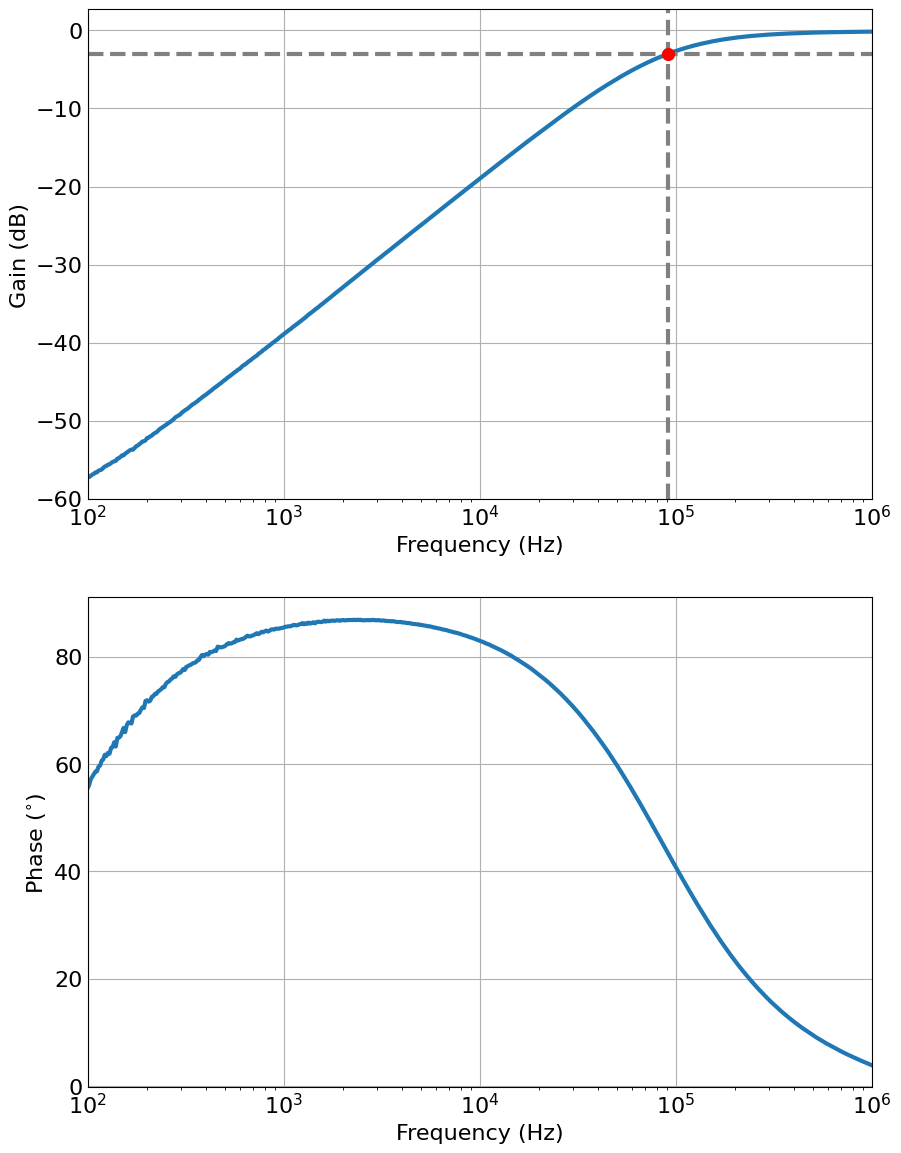

In [8]:
Fig, axs = plt.subplots(nrows=2, ncols= 1, figsize = (8,11))

axs[0].plot(Freq, Gain, linewidth = 3)
axs[0].set_xscale('log')
axs[0].tick_params('both', labelsize = 16)
axs[0].set_ylabel('Gain (dB)', fontsize = 16)
axs[0].set_xlim(np.min(Freq), np.max(Freq))
axs[0].set_xlabel('Frequency (Hz)', fontsize = 16)
axs[0].scatter(Cutoff_freq,Cutoff_gain, color = 'red', zorder = 5, s = 72)
axs[0].axvline(Cutoff_freq, linestyle = '--', linewidth = 3, color = 'grey')
axs[0].axhline(Cutoff_gain, linestyle = '--', linewidth = 3, color = 'grey')


axs[1].plot(Freq, Phase, linewidth = 3)
axs[1].set_xscale('log')
axs[1].tick_params('both', labelsize = 16)
axs[1].set_ylabel('Phase ($^{\circ}$)', fontsize = 16)
axs[1].set_xlim(np.min(Freq), np.max(Freq))
axs[1].set_xlabel('Frequency (Hz)', fontsize = 16)


0.0009924999999999
0.6293510904953561
0.000993


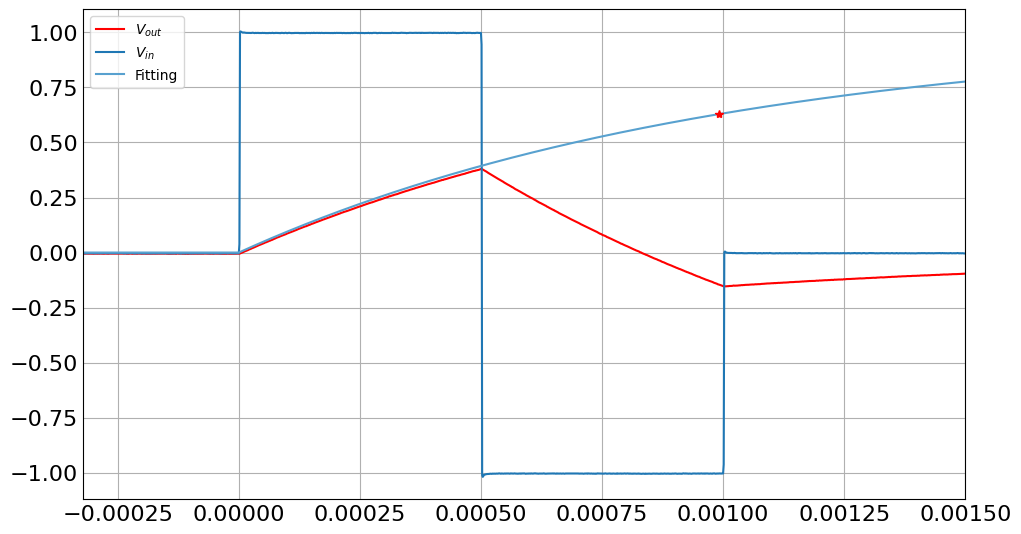

In [41]:
# Extract data
df = pd.read_csv("Task 3 - step response.csv", skiprows=18)
df.head()

t_arr = np.array(df["Time (s)"])
V_in = np.array(df["Channel 1 (V)"])
V_out = np.array(df["Channel 2 (V)"])

fig, ax = plt.subplots(figsize = (9,5))

def fit_rc(RC,t_arr,start_time = 0, Vmax = 1):

    v = np.zeros_like(t_arr)
    for i in range(len(v)):
        v[i] = 1-np.exp(-np.max([0,t_arr[i]])/RC)
        if v[i]<0:
            v[i] = 0

    return v

fit_voltage = fit_rc(0.001, t_arr)

time_RC = 0
V_RC = 0
diff = np.Inf
for i in range(len(fit_voltage)):
    diff_ = np.abs(fit_voltage[i] - 0.63)
    if diff_< 0.001:
        time_RC = t_arr[i]
        V_RC = fit_voltage[i]
        break

print(time_RC)
print(V_RC)

C = 0.993/1000
print(C)

ax.plot(t_arr, V_out, label = "$V_{out}$", color = 'red')
ax.plot(t_arr, V_in, label = "$V_{in}$")
ax.plot(t_arr, fit_voltage, label = "Fitting")
ax.plot(time_RC, V_RC, '*',color = 'red')
ax.set_xlim((t_arr[0],0.0015))
ax.tick_params('both', labelsize = 16)
ax.legend()


